In [117]:
import anndata
import os
import numpy as np
import pandas as pd

# Load the .h5ad file (replace with your filename)
input_file = os.path.join('data', 'normal','dataset.h5ad')
adata = anndata.read_h5ad(input_file)

print(adata.uns['dataset_name'])

counts = adata.layers['counts']
counts_df = pd.DataFrame(counts.toarray(), index=adata.obs_names, columns=adata.var_names)
# convert observations to a DataFrame
obs_df = adata.obs.copy()
#Join the counts_df with obs_df
joined_df = obs_df.join(counts_df, how='inner')
# Display the first few rows of the joined DataFrame
print("Joined DataFrame:")
joined_df.head()

10X Visium - Human Normal Prostate
Joined DataFrame:


,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,...,ENSG00000155962,ENSG00000185973,ENSG00000168939,ENSG00000124333,ENSG00000067646,ENSG00000092377,ENSG00000114374,ENSG00000067048,ENSG00000154620,ENSG00000012817
AAACAAGTATCTCCCA-1,1,50,102,4660,8.446985,9334.0,9.141526,12.534819,17.323763,24.501821,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
AAACAATCTACTAGCA-1,1,3,43,1461,7.287561,2010.0,7.606388,17.611940,24.378109,34.328358,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGAGCGACTCCT-1,1,14,94,4577,8.429018,8524.0,9.050758,9.713749,14.629282,21.363210,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
AAACAGCTTTCAGAAG-1,1,43,9,5170,8.550821,12350.0,9.421493,18.267206,22.623482,28.947368,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
AAACCCGAACGAAATC-1,1,45,115,2150,7.673688,3350.0,8.117014,18.268657,24.149254,32.447761,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:


# make a big df of all the data
all_data_df = joined_df.copy()

# drop columns n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_genes,size_factors
all_data_df.drop(columns=['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
                        'log1p_total_counts', 'pct_counts_in_top_50_genes',
                        'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
                        'pct_counts_in_top_500_genes', 'n_genes', 'size_factors'], inplace=True)

# work with all_data_df
# change index name to 'id'
all_data_df.reset_index(inplace=True)
all_data_df.rename(columns={'index': 'id'}, inplace=True)
# set index to id, in_tissue, array_row, array_col
all_data_df.set_index(['id', 'in_tissue', 'array_row', 'array_col'], inplace=True)
all_data_df

,,,,ENSG00000187634,ENSG00000188976,ENSG00000187961,ENSG00000187583,ENSG00000188290,ENSG00000187608,ENSG00000188157,ENSG00000131591,ENSG00000186827,ENSG00000078808,...,ENSG00000155962,ENSG00000185973,ENSG00000168939,ENSG00000124333,ENSG00000067646,ENSG00000092377,ENSG00000114374,ENSG00000067048,ENSG00000154620,ENSG00000012817
id,in_tissue,array_row,array_col,,,,,,,,,,,,,,,,,,,,,
AAACAAGTATCTCCCA-1,1,50,102,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
AAACAATCTACTAGCA-1,1,3,43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGAGCGACTCCT-1,1,14,94,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
AAACAGCTTTCAGAAG-1,1,43,9,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
AAACCCGAACGAAATC-1,1,45,115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTGGTATAGGTATG-1,1,24,126,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
TTGTTAGCAAATTCGA-1,1,22,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
TTGTTCAGTGTGCTAC-1,1,24,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0


In [119]:
# find top 100 genes with greatest variance
top_variance_genes = all_data_df.var().nlargest(100)
# create a new DataFrame with only the top 100 genes
top_variance_genes_df = all_data_df[top_variance_genes.index]

In [120]:
# convert the DataFrame to a array
top_variance_genes_array = top_variance_genes_df.values
top_variance_genes_array

array([[ 46., 151.,  36., ...,   8.,   6.,   9.],
       [ 11.,  12.,   5., ...,   0.,   3.,   1.],
       [  4.,   2.,   4., ...,   6.,   0.,   1.],
       ...,
       [ 20.,  12.,   2., ...,   4.,   5.,   0.],
       [ 15.,   5.,   3., ...,   5.,   2.,   1.],
       [ 50.,  49.,   6., ...,   5.,   2.,   2.]], dtype=float32)

In [121]:
# put x and y coordinates in a array
xy_coords_df = all_data_df.reset_index()[['array_row', 'array_col']]
xy_coords_array = xy_coords_df.values
xy_coords_array

array([[ 50, 102],
       [  3,  43],
       [ 14,  94],
       ...,
       [ 24,  64],
       [ 31,  77],
       [ 45,  27]])

Points type: <class 'numpy.ndarray'>
Gene expression type: <class 'numpy.ndarray'>


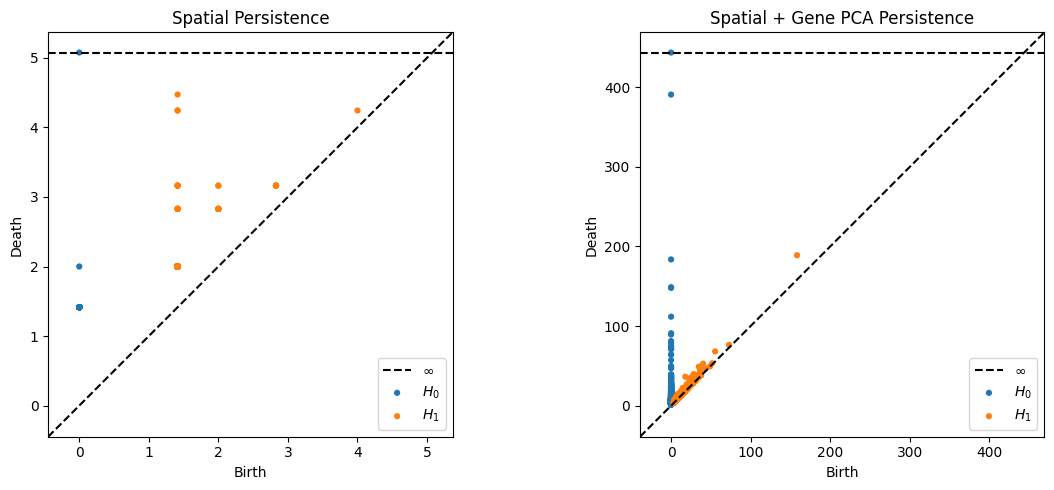

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
from sklearn.decomposition import PCA

points = xy_coords_array
gene_expr = top_variance_genes_array

spatial_coords = points

# print types
print("Points type:", type(points))
print("Gene expression type:", type(gene_expr))


# spatial_coords = np.concatenate(points, axis=0)
# gene_expr = np.concatenate(gene_expr, axis=0)

# Step 2: PCA on gene expression
pca = PCA(n_components=2)
gene_pca = pca.fit_transform(gene_expr)

# Step 3: Combine spatial and gene PCA data
combined_data = np.hstack([spatial_coords, gene_pca])

# Step 4: Persistent homology
result_spatial = ripser(spatial_coords)
result_combined = ripser(combined_data)

# Step 5: Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title("Spatial Persistence")
plot_diagrams(result_spatial["dgms"], show=False, ax=axs[0])

axs[1].set_title("Spatial + Gene PCA Persistence")
plot_diagrams(result_combined["dgms"], show=False, ax=axs[1])

plt.tight_layout()
plt.show()

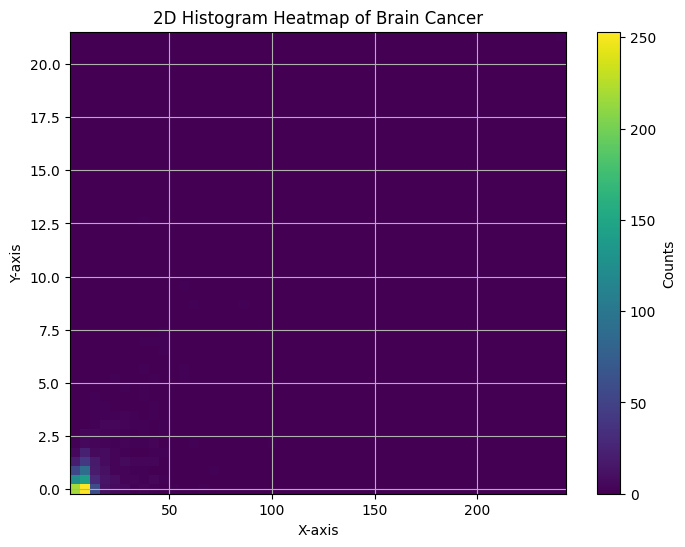

In [123]:
# convert a list of points to 2 lists of x and y coordinates
x_coords = [point[0] for point in result_combined["dgms"][1]]
y_coords = [point[1] for point in result_combined["dgms"][1]]
coords = np.array([x_coords, y_coords]).T
#rotate the points by 45 degrees clockwise
def rotate_points(points, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    rotation_matrix = np.array([[np.cos(angle_radians), -np.sin(angle_radians)],
                                 [np.sin(angle_radians), np.cos(angle_radians)]])
    return points @ rotation_matrix.T
rotated_points = rotate_points(coords, -45)  # Rotate by -45 degrees

# Create a 2D histogram (heatmap) of the rotated points
heatmap, xedges, yedges = np.histogram2d(rotated_points[:, 0], rotated_points[:, 1], bins=50)
# Create a meshgrid for the heatmap
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, heatmap.T, shading='auto', cmap='viridis')
plt.colorbar(label='Counts')
plt.title('2D Histogram Heatmap of Brain Cancer')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# set yaxis to 0 - 30
# plt.gca().set_ylim(bottom=0, top=30)
# set xaxis to 0 - 100
# plt.gca().set_xlim(left=0, right=100)
plt.grid()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import kmapper as km

# Step 1: Generate synthetic X10-like gene expression data
# Simulate 3 clusters of cells in 50-dimensional gene space
test = top_variance_genes_df.reset_index(drop=True)
X = StandardScaler().fit_transform(test.values)

# Convert to DataFrame (simulate genes as columns)
gene_names = [f"Gene_{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=gene_names)

# Step 2: Initialize KeplerMapper
mapper = km.KeplerMapper(verbose=1)

# Step 3: Use PCA as lens
lens = mapper.fit_transform(df, projection=PCA(n_components=2))

# Step 4: Create a Mapper graph
graph = mapper.map(
    lens,
    df.values,
    clusterer=DBSCAN(eps=5.0, min_samples=3),
    cover=km.Cover(n_cubes=50, perc_overlap=0.5)
)

# Step 5: Visualize (save HTML)
html_path = "mapper_x10_synthetic_test.html"
mapper.visualize(
    graph,
    path_html=html_path,
    title="Mapper on X10 Genomic Data"
)

html_path  # Return path to HTML file


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: PCA(n_components=7)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (2543, 100)

..Projecting data using: 
	PCA(n_components=7)


..Scaling with: MinMaxScaler()

Mapping on data shaped (2543, 100) using lens shaped (2543, 7)



In [125]:
'cube138_cluster0' in graph['links'].keys()  # Check if the cluster exists in the graph

False

In [126]:
graph['links']

defaultdict(list,
            {'cube5_cluster0': ['cube6_cluster0',
              'cube25_cluster0',
              'cube26_cluster0'],
             'cube6_cluster0': ['cube7_cluster0',
              'cube25_cluster0',
              'cube26_cluster0',
              'cube27_cluster0'],
             'cube7_cluster0': ['cube8_cluster0',
              'cube26_cluster0',
              'cube27_cluster0',
              'cube28_cluster0'],
             'cube8_cluster0': ['cube9_cluster0',
              'cube27_cluster0',
              'cube28_cluster0',
              'cube29_cluster0'],
             'cube9_cluster0': ['cube10_cluster0',
              'cube28_cluster0',
              'cube29_cluster0',
              'cube30_cluster0'],
             'cube10_cluster0': ['cube11_cluster0',
              'cube29_cluster0',
              'cube30_cluster0',
              'cube31_cluster0'],
             'cube11_cluster0': ['cube12_cluster0',
              'cube30_cluster0',
              'cube31_clust

In [127]:
def find_connected_components(graph):
    """
    Find all connected components in an undirected graph represented by an adjacency list.

    Args:
        graph (dict): Dictionary where keys are nodes and values are lists of adjacent nodes.

    Returns:
        list: List of sets, where each set contains nodes in a connected component.
    """
    def dfs(node, visited, component):
        """
        Depth-First Search to explore all nodes in a connected component.

        Args:
            node (str): Current node being explored.
            visited (set): Set of nodes already visited.
            component (set): Current connected component being built.
        """
        visited.add(node)
        component.add(node)
        # Explore all neighbors
        for neighbor in graph.get(node, []):
            if neighbor not in visited:
                dfs(neighbor, visited, component)

    visited = set()
    components = []

    # Iterate over all nodes to ensure all components are found
    for node in graph:
        if node not in visited:
            current_component = set()
            dfs(node, visited, current_component)
            components.append(current_component)

    # Add isolated nodes (nodes not in graph keys but in values)
    all_nodes = set(graph.keys())
    for neighbors in graph.values():
        all_nodes.update(neighbors)

    for node in all_nodes:
        if node not in visited:
            components.append({node})
            visited.add(node)

    return components

# Example usage with the provided data
graph_test = graph['links']

components = find_connected_components(graph_test)

# Print the connected components
for i, component in enumerate(components, 1):
    print(f"Component {i}: {component}")

Component 1: {'cube92_cluster0', 'cube52_cluster0', 'cube27_cluster0', 'cube124_cluster1', 'cube29_cluster0', 'cube15_cluster0', 'cube39_cluster0', 'cube86_cluster0', 'cube118_cluster0', 'cube54_cluster0', 'cube84_cluster0', 'cube30_cluster0', 'cube95_cluster0', 'cube128_cluster0', 'cube42_cluster0', 'cube126_cluster0', 'cube14_cluster0', 'cube89_cluster0', 'cube91_cluster0', 'cube53_cluster0', 'cube62_cluster0', 'cube60_cluster0', 'cube25_cluster0', 'cube69_cluster0', 'cube94_cluster0', 'cube5_cluster0', 'cube127_cluster0', 'cube99_cluster0', 'cube59_cluster0', 'cube98_cluster0', 'cube122_cluster1', 'cube40_cluster0', 'cube93_cluster0', 'cube81_cluster0', 'cube123_cluster0', 'cube98_cluster1', 'cube64_cluster0', 'cube100_cluster0', 'cube67_cluster0', 'cube7_cluster0', 'cube10_cluster0', 'cube6_cluster0', 'cube128_cluster2', 'cube127_cluster1', 'cube57_cluster0', 'cube37_cluster0', 'cube87_cluster0', 'cube70_cluster0', 'cube12_cluster0', 'cube60_cluster1', 'cube83_cluster0', 'cube97_cl

In [128]:
len(components)  # Return the number of connected components found

3